In [89]:
from sympy import *
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from prettytable import PrettyTable

In [2]:
x,y,z,s,t,r = symbols('x y z s t r')

In [16]:
integrate(2*r*z, (z,0,sqrt(4-r**2)), (r,0,2), (t,0,2*pi))

8*pi

In [17]:
integrate(5*x*sin(x**2), (x,0,sqrt(pi)/2))

-5*sqrt(2)/4 + 5/2

In [18]:
integrate(3*x**2 - 6*sqrt(x), (x,0,4))

32

In [21]:
float(integrate(sqrt(5*t**2 + 4), (t,1,5)))

28.2000824414056

In [33]:
np.set_printoptions(precision=128)

In [43]:
def f(x):
    return np.sin(x)/x

fx = [N(f(-10**t),20) for t in np.arange(-1,-6,-1, dtype='float64')]

fx

[0.99833416646828154750,
 0.99998333341666645335,
 0.99999983333334163671,
 0.99999999833333341748,
 0.99999999998333322093]

In [47]:
def f(x):
    return (x**3 - 8) / (x - 2)

fx = [N(f(2-10**t),20) for t in np.arange(-1,-6,-1, dtype='float64')]

fx

[11.409999999999998366,
 11.940099999999976177,
 11.994001000000132251,
 11.999400009995653704,
 11.999940000083853420]

In [49]:
def f(x):
    return np.log(1+x)/x

fx = [N(f(-10**t),20) for t in np.arange(-1,-6,-1, dtype='float64')]

fx

[1.0536051565782627026,
 1.0050335853501450867,
 1.0005003335835342959,
 1.0000500033334731587,
 1.0000050000287823426]

In [85]:
def y(t):
    return 16*t**2

tvals = [2, 2.1, 2.01, 2.001]

t0 = tvals[0]

tbl = PrettyTable(['t', 'y(t)', "Δt", 'Δy', 'Δy/Δt'])

for t in tvals:
    yt = y(t)
    yt0 = y(t0)
    Δt = t - t0
    Δy = yt - yt0
    if Δt != 0:
        DyDt = round(Δy/Δt,6)
    else:
        DyDt = "0/0 (undef)"
    tbl.add_row([t, round(yt,6), round(Δt,3), round(Δy,6), DyDt])
    
print(tbl)

outfile = open("tables_PrettyTable.txt", "w")    
print(tbl, file=outfile)
outfile.close()

In [206]:
def y(t):
    return 16*t**2

def makeTable(tvals):
    t0 = tvals[0]
    table = np.zeros([len(tvals),5], dtype='float64')
    
    for t in tvals:
        yt = y(t)
        yt0 = y(t0)
        Δt = np.abs(t - t0)
        Δy = np.abs(yt - yt0)
        if Δt != 0:
            DyDt = Δy/Δt
        else:
            DyDt = np.nan
            
        table[tvals.index(t),:] = np.trim_zeros([t, yt, Δt, Δy, DyDt])
        
    df = pd.DataFrame(table, columns=['t', 'y(t)', 'Δt', 'Δy', 'Δy/Δt'])
        
    return df

In [207]:
tbl1 = makeTable([2, 2.1, 2.01, 2.001, 2.0001, 2.00001])
tbl2 = makeTable([2, 1.9, 1.99, 1.999, 1.9999, 1.99999])

tbl3 = makeTable([3 if n == 0 else 3 + 0.1**n for n in range(6)])
tbl4 = makeTable([3 if n == 0 else 3 - 0.1**n for n in range(6)])


print(tbl1.to_string(index=False))
print("\n")
print(tbl2.to_string(index=False))
print("\n")
print(tbl3.to_string(index=False))
print("\n")
print(tbl4.to_string(index=False))

outfile = open("tables.txt", "w")
print(tbl1.to_string(index=False), file=outfile)
print("\n", file=outfile)
print(tbl2.to_string(index=False), file=outfile)
print("\n", file=outfile)
print(tbl3.to_string(index=False), file=outfile)
print("\n", file=outfile)
print(tbl4.to_string(index=False), file=outfile)
outfile.close()


       t       y(t)       Δt        Δy     Δy/Δt
 2.00000  64.000000  0.00000  0.000000       NaN
 2.10000  70.560000  0.10000  6.560000  65.60000
 2.01000  64.641600  0.01000  0.641600  64.16000
 2.00100  64.064016  0.00100  0.064016  64.01600
 2.00010  64.006400  0.00010  0.006400  64.00160
 2.00001  64.000640  0.00001  0.000640  64.00016


       t       y(t)       Δt        Δy     Δy/Δt
 2.00000  64.000000  0.00000  0.000000       NaN
 1.90000  57.760000  0.10000  6.240000  62.40000
 1.99000  63.361600  0.01000  0.638400  63.84000
 1.99900  63.936016  0.00100  0.063984  63.98400
 1.99990  63.993600  0.00010  0.006400  63.99840
 1.99999  63.999360  0.00001  0.000640  63.99984


       t        y(t)       Δt        Δy     Δy/Δt
 3.00000  144.000000  0.00000  0.000000       NaN
 3.10000  153.760000  0.10000  9.760000  97.60000
 3.01000  144.961600  0.01000  0.961600  96.16000
 3.00100  144.096016  0.00100  0.096016  96.01600
 3.00010  144.009600  0.00010  0.009600  96.00160
 3.00001  

14.641968322097641
1.665015683926963


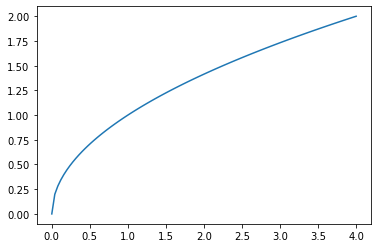

In [60]:
a = 0
b = 4
n = 100

Δx = (b - a)/(n+1)

x = np.linspace(a, b, n+2)
y = np.sqrt(x)
# y[70] = 1.4
# y[20] = 1

plt.plot(x,y)

# f(x,y,y') = xy + y'

# J[y]
sum = 0
for i in range(n+1):
    sum += (x[i]*y[i] + (y[i+1]-y[i])/Δx) * Δx
    
print(sum)
print(y[70])